# 🖼️ Image Caption Generator with Gemini

This notebook demonstrates how to use Google's Gemini API to generate captions for images in different styles.

## Setup and Installation

First, let's install the required packages:

In [11]:
# Install required packages
!pip install google-genai


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [1]:
from google import genai
import os
from IPython.display import Image, display

## Set API Key

Replace with your own Google AI Studio API key:

In [ ]:
# Set your API key
# For better security, you should use environment variables instead of hardcoding
# os.environ["GOOGLE_API_KEY"] = "your-api-key-here"
# client = genai.Client(api_key=os.environ["GOOGLE_API_KEY"])

# For simplicity in this notebook, we're using a direct API key
client = genai.Client(api_key="your_api_key") # Replace with your actual API key this won't work

## Define Caption Generation Function

In [7]:
def generate_caption(image_path, description_type="short"):
    """
    Generate a caption for an image using Gemini.
    
    Args:
        image_path (str): Path to the image file
        description_type (str): Type of description to generate ("short", "detailed", or "poetic")
        
    Returns:
        str: Generated caption
    """
    # Map description type to prompt
    prompt_map = {
        "short": "Write a 1-line caption for this image.",
        "detailed": "Describe this image in detail.",
        "poetic": "Write a short poem based on this image."
    }
    
    # Use the default if an invalid type is provided
    prompt = prompt_map.get(description_type.lower(), prompt_map["short"])
    
    # Upload the image to Gemini
    gemini_file = client.files.upload(file=image_path)
    
    # Generate content using Gemini
    response = client.models.generate_content(
        model="gemini-2.0-flash",
        contents=[gemini_file, prompt],
    )
    
    return response.text

## Display Function to Show Image and Caption

In [8]:
def display_image_with_caption(image_path, caption):
    """
    Display an image with its caption.
    
    Args:
        image_path (str): Path to the image file
        caption (str): Caption to display below the image
    """
    print("Image:")
    display(Image(filename=image_path, width=500))
    print("\nCaption:")
    print(caption)

## Example Usage: Generating Captions for an Image

### 1. Short Caption Example

Image:


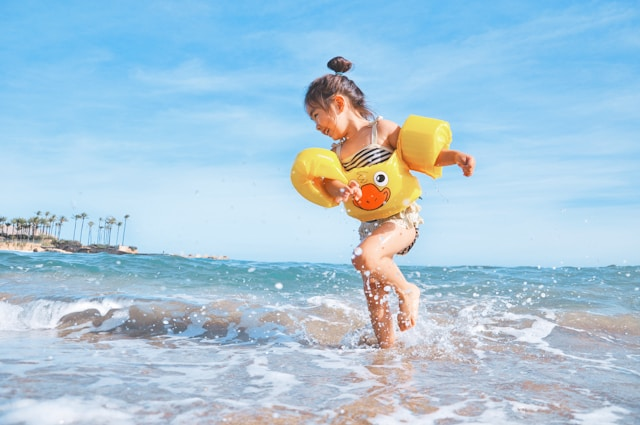


Caption:
A young girl gleefully runs through the ocean waves, wearing a duck-shaped life vest.



In [ ]:
# Path to your image - change this to the path of your image
image_path = "/images/leo-rivas-R_BLOGXpsOg-unsplash.jpg"

# Generate a short caption
short_caption = generate_caption(image_path, "short")

# Display the image with the caption
display_image_with_caption(image_path, short_caption)

### 2. Detailed Description Example

Image:


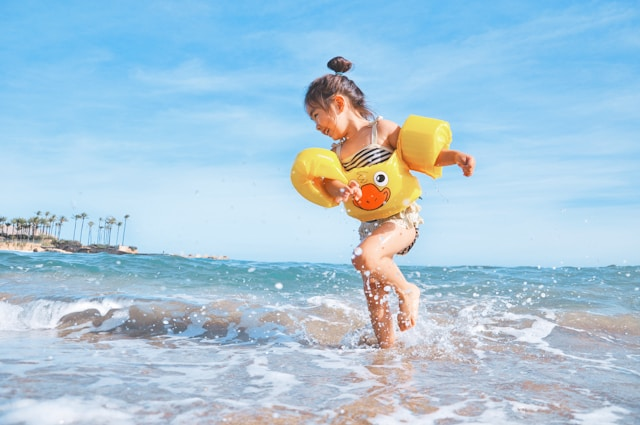


Caption:
Here is a detailed description of the image:

**Overall Impression:**

The image captures a joyful moment of a young girl playing in the waves at the beach. The bright colors, the splashing water, and the girl's expression evoke a sense of carefree fun and summer vibes.

**Subject:**

*   **The Girl:** The main subject is a young Asian girl. She is wearing a striped swimsuit and a yellow duck-shaped inflatable life vest (with arm floaties). Her hair is tied up in a small bun on top of her head. She is running through the shallow water, her feet splashing and kicking up foam. Her face shows a happy and excited expression, with a slight smile.

**Setting/Background:**

*   **The Beach:** The scene is set on a sunny beach. The water is a clear turquoise-blue color, with gentle waves rolling in. There's a sandy shore in the foreground, partially submerged by the water. In the distance, there's a rocky headland or small island visible, dotted with palm trees.
*   **The Sky:** The 

In [7]:
# Generate a detailed description
detailed_caption = generate_caption(image_path, "detailed")

# Display the image with the detailed description
display_image_with_caption(image_path, detailed_caption)

### 3. Poetic Caption Example

Image:


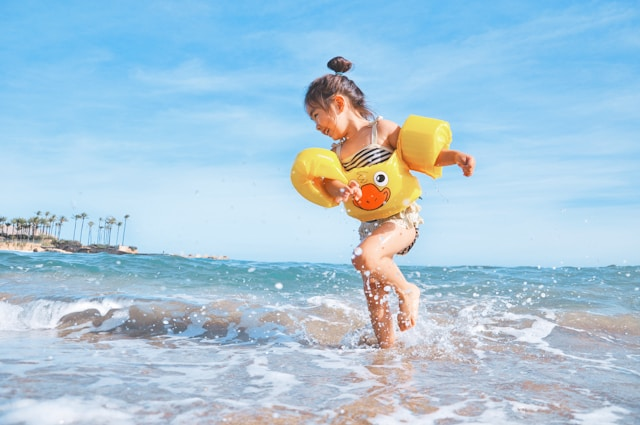


Caption:
Little feet dance on the shore,
A child's delight, wanting more.
Waves crash gently, a playful chase,
Sunlight on a happy face.

Yellow duck keeps them afloat,
A memory to take note.
The ocean's rhythm, a joyful sound,
In seaside glee, safe and sound.



In [8]:
# Generate a poetic caption
poetic_caption = generate_caption(image_path, "poetic")

# Display the image with the poetic caption
display_image_with_caption(image_path, poetic_caption)

## Using the Function with Your Own Images

In [9]:
# Example function to process a custom image
def process_custom_image(image_path):
    print("Processing image:", image_path)
    
    # Display the image
    display(Image(filename=image_path, width=500))
    
    # Generate all three types of captions
    caption_types = ["short", "detailed", "poetic"]
    
    for caption_type in caption_types:
        print(f"\n{caption_type.capitalize()} Caption:")
        caption = generate_caption(image_path, caption_type)
        print(caption)
        print("-" * 50)  # Separator

Processing image: C:/GDSC/BwAI/build-with-ai/images/leo-rivas-R_BLOGXpsOg-unsplash.jpg


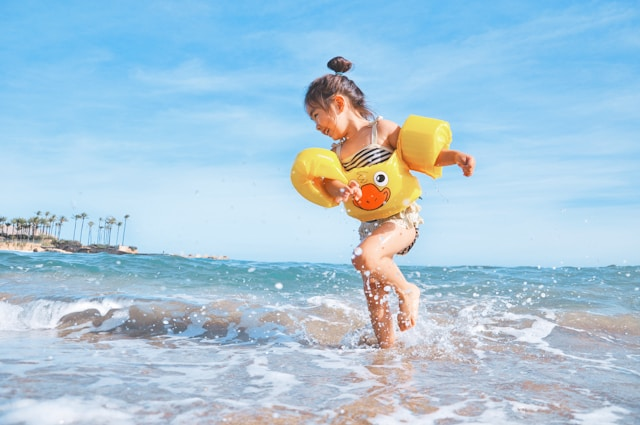


Short Caption:
A young girl gleefully runs through the waves at the beach, wearing a duck-shaped swim vest and arm floats.

--------------------------------------------------

Detailed Caption:
Here is a detailed description of the image:

**Overall Impression:**

The image captures a joyful moment of a young child playing in the ocean. The scene is brightly lit and evokes a sense of carefree fun and summer vacation.

**Subject:**

The primary subject is a young Asian girl. She has dark hair styled in a bun on top of her head. She is wearing a swimsuit with a black and white striped top and frilly light-colored bottoms. She has yellow inflatable arm floaties on her arms, and a duck-shaped inflatable vest. She appears to be running or splashing through the shallow water at the edge of the beach. Her expression is one of happiness, possibly excitement, as she looks towards something in the distance.

**Setting:**

The scene is set on a beach with a clear blue sky above. The water is a t

In [ ]:
# Replace with your own image path
custom_image_path = "/images/leo-rivas-R_BLOGXpsOg-unsplash.jpg"

# Process your custom image
process_custom_image(custom_image_path)

## Processing Multiple Images

In [11]:
def process_image_batch(image_paths, caption_type="short"):
    """
    Process a batch of images and generate captions of the specified type.
    
    Args:
        image_paths (list): List of paths to image files
        caption_type (str): Type of description to generate
    """
    for i, img_path in enumerate(image_paths):
        print(f"Image {i+1}/{len(image_paths)}:")
        try:
            # Display the image
            display(Image(filename=img_path, width=500))
            
            # Generate caption
            caption = generate_caption(img_path, caption_type)
            
            # Display caption
            print(f"\n{caption_type.capitalize()} Caption:")
            print(caption)
            
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
        
        print("\n" + "-"*70 + "\n")  # Separator between images

In [ ]:
# Example batch of images
image_batch = [
    "path/to/image1.jpg",
    "path/to/image2.jpg",
    "path/to/image3.jpg"
]

# Process the batch with poetic captions
process_image_batch(image_batch, "poetic")

## Conclusion

This notebook demonstrates how to use Google's Gemini API to generate different types of captions for images. You can:

1. Generate short, detailed, or poetic captions for a single image
2. Process multiple images in a batch
3. Customize the prompts to get different types of captions

Feel free to modify the code to suit your specific needs!

Made with ❤️ by [Moosa Raza](https://www.linkedin.com/in/syed-moosa-raza-rizvi)